# Convolutional Neural Network

CNN to identify picture as dog or cat

### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__

'2.13.1'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Data/Dog_V_Cat_Data/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Data/Dog_V_Cat_Data/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

# Convolution
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

#Additional Convolutional Layer with Pooling
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

#Flattening
cnn.add(tf.keras.layers.Flatten())

#Full Connection
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

#Output Layer
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [7]:
cnn.layers

## Part 3 - Training the CNN

### Compiling the CNN

In [8]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [9]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)

Epoch 1/30
250/250 [==============================] - 33s 130ms/step - loss: 0.6564 - accuracy: 0.5996 - val_loss: 0.6928 - val_accuracy: 0.5845
Epoch 2/30
250/250 [==============================] - 31s 123ms/step - loss: 0.5870 - accuracy: 0.6795 - val_loss: 0.5349 - val_accuracy: 0.7415
Epoch 3/30
250/250 [==============================] - 30s 120ms/step - loss: 0.5443 - accuracy: 0.7265 - val_loss: 0.5317 - val_accuracy: 0.7325
Epoch 4/30
250/250 [==============================] - 31s 123ms/step - loss: 0.5131 - accuracy: 0.7405 - val_loss: 0.4837 - val_accuracy: 0.7615
Epoch 5/30
250/250 [==============================] - 30s 121ms/step - loss: 0.4895 - accuracy: 0.7624 - val_loss: 0.5172 - val_accuracy: 0.7465
Epoch 6/30
250/250 [==============================] - 30s 120ms/step - loss: 0.4783 - accuracy: 0.7649 - val_loss: 0.4896 - val_accuracy: 0.7700
Epoch 7/30
250/250 [==============================] - 30s 121ms/step - loss: 0.4534 - accuracy: 0.7826 - val_loss: 0.4824 - val_ac

## Part 4 - Making a single prediction

In [11]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('Data/Dog_V_Cat_Data/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image/255.0)
training_set.class_indices
if result[0][0] > 0.5:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 56ms/step


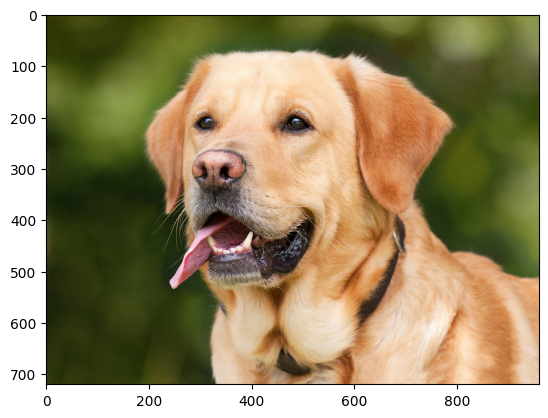

Prediction: dog


In [21]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image1 = mpimg.imread('Data/Dog_V_Cat_Data/single_prediction/cat_or_dog_1.jpg')
plt.imshow(image1)
plt.show()

print('Prediction:', prediction)

In [14]:
import numpy as np
from keras.preprocessing import image
test_image2 = image.load_img('Data/Dog_V_Cat_Data/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image2 = image.img_to_array(test_image2)
test_image2 = np.expand_dims(test_image2, axis = 0)
result = cnn.predict(test_image2/255.0)
training_set.class_indices
if result[0][0] > 0.5:
  prediction2 = 'dog'
else:
  prediction2 = 'cat'

1/1 [==============================] - 0s 11ms/step


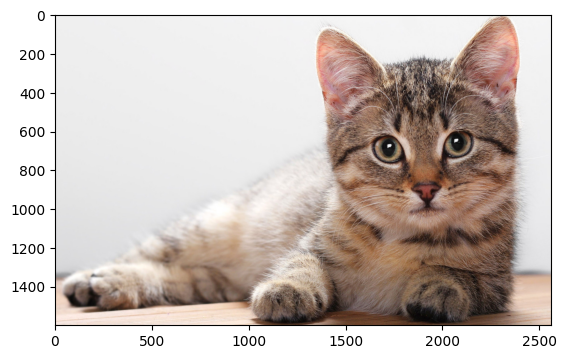

Prediction: cat


In [20]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image2 = mpimg.imread('Data/Dog_V_Cat_Data/single_prediction/cat_or_dog_2.jpg')
plt.imshow(image2)
plt.show()

print('Prediction:', prediction2)